# Data Analysis and Machine Learning Price Prediction of Data Science Books 

Disclaimer: The model evaluation, model finetuning and model deployment parts not finished.

### Intoduction

I wanted to find some good books on data science. This quest made me realize that there is a jungle of different data science related books, which can make it difficult for people to decide what they want to read. This also made me thinking: What does data about books actually tell us? How does things like reviews and page length correlate with the books price? And how can machine learning be utilized to predict a books price? My goal for this project is to go through some key stages of the data science process and provide some valuable insights trough data analysis and machine learning.

Through the project I aim to cover the following parts:

- Data collecting

- Data cleaning

- Feature Engineering

- Exploratory data anlaysis (EDA)

- Machine Learning: Price Prediction

During the EDA I will try to explore and answer the following questions:

1. Which author has written the most books and pages?

3. Which books have the best price value (rating/price)?

4. What are the most common words in the book titles?

undefined. Does a book with many pages tend to be more pricy?

5. Does a newer book tend to be more pricy? 

I will mostly use Python and key libraries like Pandas, Scikit-learn, Matplotlib and Seaborn.

## Data collecting

At first I wanted to scrape Amazon for the the search result "Data science books". On furhter investigation I found a data set on Kaggle containig the excact data I was looking for. I therefore decided to use that data set. The data set can be found here: https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books.

### Importing libraries and loading data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from functools import reduce
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)
from wordcloud import WordCloud

In [2]:
# load data
df = pd.read_csv('/work/data_science_books.csv')

### Initial Data Exploration

In [3]:
display(df)

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Deep Learning: Engage the World Change the World,"[ Michael Fullan, Joanne Quinn, et al.]",5.33,8.55 - 35.33,208,4.5,74,72%,14%,7%,2%,4%,7 x 0.47 x 10 inches,15.5 ounces,English,"Corwin; First edition (December 15, 2017)",59,/Deep-Learning-Engage-World-Change/dp/15063685...,https://www.amazon.com/Deep-Learning-Engage-Wo...
826,Machine Learning in Finance: From Theory to Pr...,"[ Matthew F. Dixon, Igor Halperin, et al.]",55.18,52.41 - 55.18,573,4.5,93,78%,7%,7%,4%,4%,6.14 x 1.25 x 9.21 inches,2.25 pounds,English,"Springer; 1st ed. 2020 edition (July 2, 2020)",,/Machine-Learning-Finance-Theory-Practice/dp/3...,https://www.amazon.com/Machine-Learning-Financ...
827,Practical Deep Learning at Scale with MLflow: ...,"[ Yong Liu, and , Dr. Matei Zaharia]",44.99,44.99,288,4.8,8,83%,17%,NaN,NaN,NaN,7.5 x 0.65 x 9.25 inches,1.1 pounds,English,"Packt Publishing (July 8, 2022)",978-1803241333,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
828,Clinical Biostatistics and Epidemiology Made R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Clinical-Biostatistics-Epidemiology-Ridiculou...,https://www.amazon.com/Clinical-Biostatistics-...


In [4]:
df.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


In [5]:
df.describe()

,price,avg_reviews
count,722.000000,702.000000
mean,46.491537,4.472080
std,63.292394,0.409608
min,0.990000,1.000000
25%,23.725000,4.325000
50%,39.490000,4.500000
75%,51.990000,4.700000
max,1318.740000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

In [7]:
df.isnull().sum()

title                             0
author                          173
price                           108
price (including used books)    108
pages                            85
avg_reviews                     128
n_reviews                       128
star5                           128
star4                           195
star3                           276
star2                           379
star1                           502
dimensions                      186
weight                          179
language                         71
publisher                       116
ISBN_13                         165
link                              0
complete_link                     0
dtype: int64

In [8]:
df.nunique()

title                           830
author                          605
price                           437
price (including used books)    523
pages                           376
avg_reviews                      22
n_reviews                       289
star5                            67
star4                            48
star3                            33
star2                            20
star1                            19
dimensions                      540
weight                          273
language                         12
publisher                       694
ISBN_13                         503
link                            830
complete_link                   830
dtype: int64

In [9]:
df['language'].unique()

array(['English', nan, 'Spanish',
       'Unqualified, Japanese (Dolby Digital 2.0 Mono), English (Dolby Digital 5.1), English (Dolby Digital 2.0 Mono)',
       'you will discover all you need ',
       '• How to make better business decisions using ',
       'Concepts are presented in a "to-the-point" style to cater to the busy individual. With this book, you can learn Python in just one day and start coding immediately. ',
       'standard library',
       'This Python programming guide assumes certain level of programming knowledge. It is not a beginner textbook.',
       'Scroll to the top of the page and click the ',
       'English (Dolby Digital 2.0 Mono)',
       'English (DTS-HD Master Audio 5.1), French (DTS-HD 2.0)',
       '"Brilliant."'], dtype=object)

The language column is not very usefull has most books are in English, while the rest of the pack usally have some wrong value in the language column.

<AxesSubplot: >

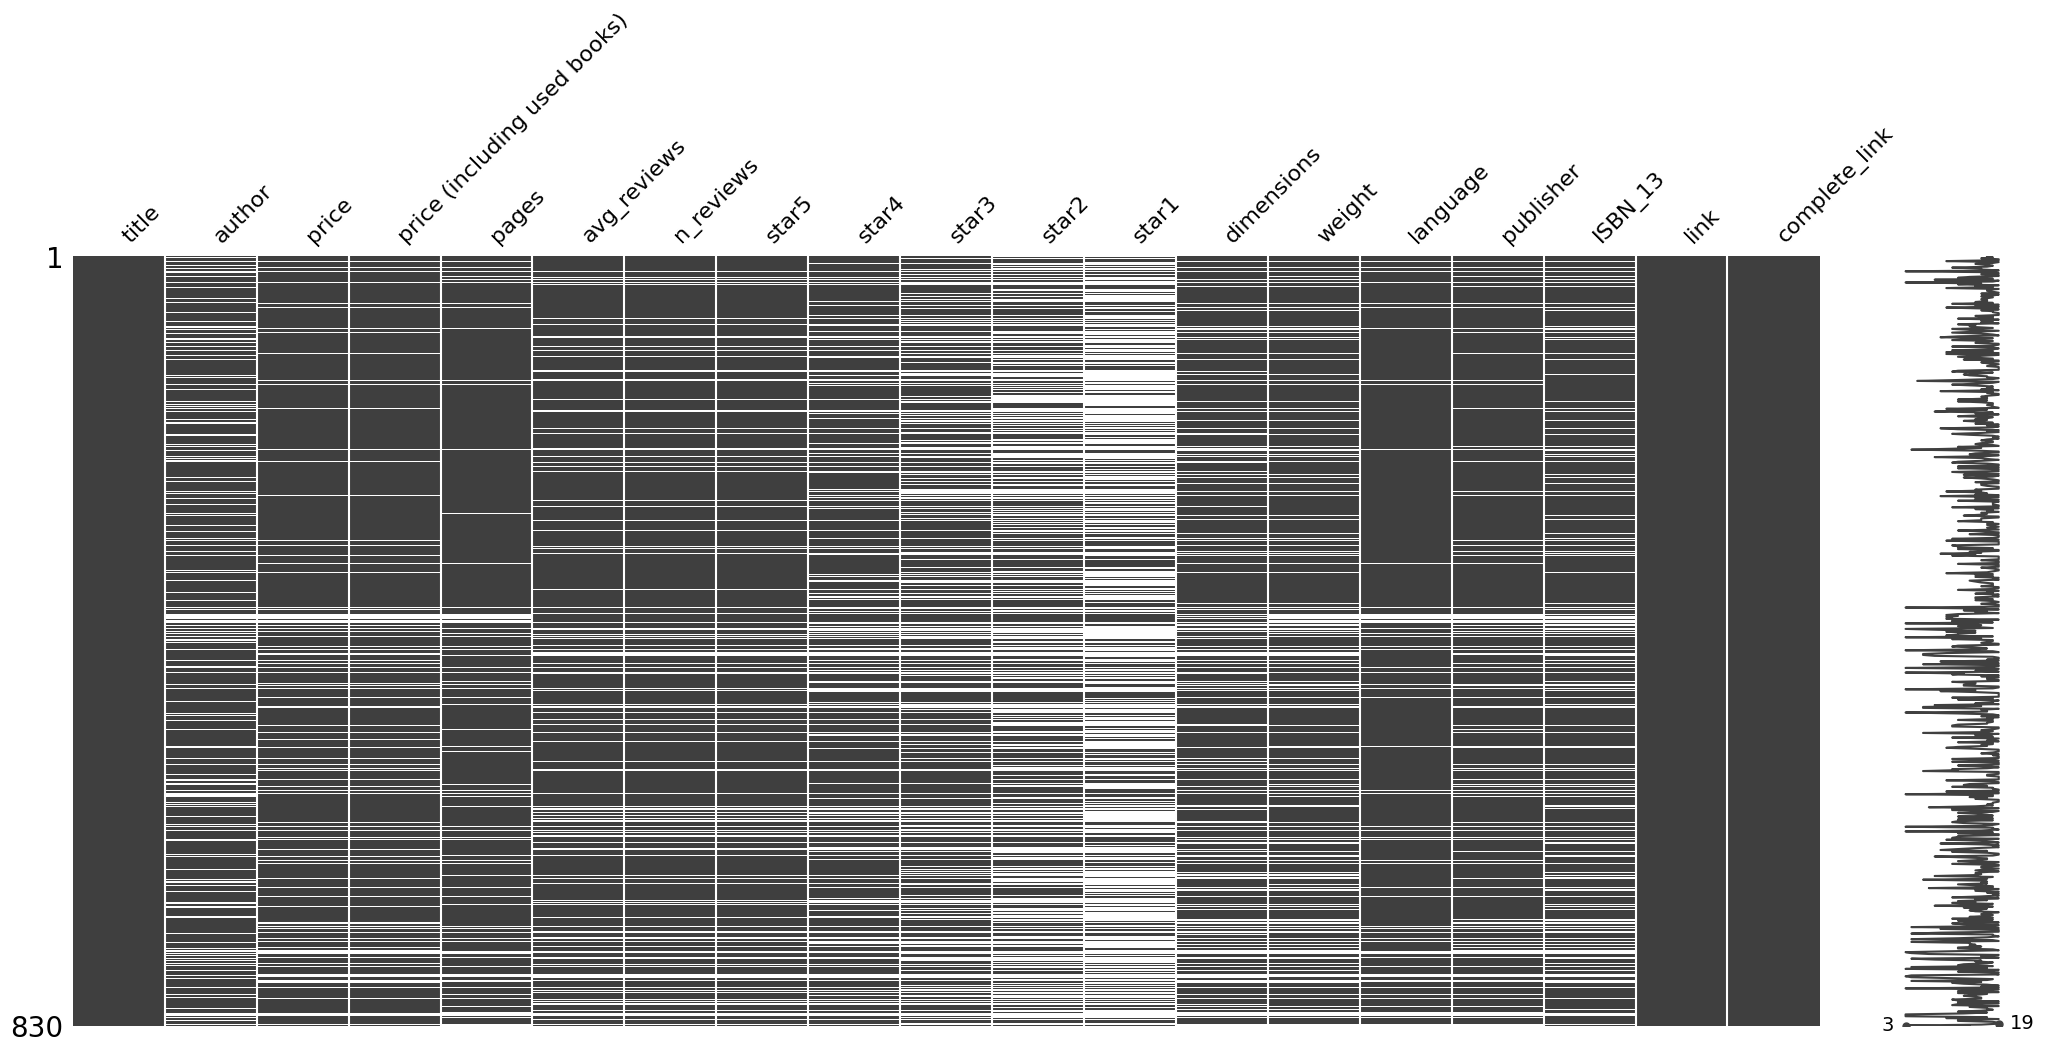

In [10]:
# missing values visualized
msno.matrix(df)

## Data cleaning/preperation for EDA

Things I want to achieve through this cleaning stage:

- Drop irrelevant columns.

- Drop rows containing null values.

- Fix the book price: Some places the book price has been registred as the discounted price instead of the actual book price.

- Book rating: Change "x out of 5 starts" to simply x (as a float type).

- To simplify, I will also change it so the author column only show the first author when there are more than one.

In [11]:
# drop columns that I won't use for my analysis
df = df.drop(columns=['link', 'complete_link', 'ISBN_13', 'price (including used books)', 'language'])

# showcasing only the first author of each book
df['author'] = df['author'].str.split(',').str[0].str.replace('[','').str.replace(']','').str.strip()

# make pages' and n_reviews' data type into integer.
df['pages'] = pd.to_numeric(df['pages'], errors='coerce').astype('Int64')
df['n_reviews'] = pd.to_numeric(df['n_reviews'], errors='coerce').astype('Int64')

# remove persentage symbol, and make the values for the star persentage into integer type.
def star_percent_transform(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column].str.replace('%',''), errors='coerce').astype('Int64')

star_percent_transform(df, ['star5', 'star4', 'star3', 'star2', 'star1'])

# making the weight into grams and as a float data type
ibs_to_kg = 0.45359237
df['weight'] = pd.to_numeric(df['weight'].str.split().str[0], errors='coerce').astype('float64').mul(ibs_to_kg*1000).round(1)

## Feature Engineering

I want to perform some feature augementation to create some additional features which I think will be usefull/interesting for the data analysis. First of I want to use the dimension feature to create a volume feature, which is the volume of the book in cm^3. Furthermore, as the publisher data is formated "Publisher; edition (date published)", I want to augment a two different features publish name and year published.

In [12]:
# using the dimensions column, I create a new column with the book's volume given in cm*3 (or ml)
inch_to_cm = 2.53
vol_col = pd.DataFrame(columns=['volume'])
for val in df['dimensions']:
    if isinstance(val, float):
        vol_col.loc[len(vol_col)] = val
    else:
        nums = val.split()
        nums = [nums[0], nums[2], nums[4]]
        nums = [float(num)*inch_to_cm for num in nums]
        res = reduce(lambda x, y: x*y, nums)
        vol_col.loc[len(vol_col)] = res

# as we no longer need dimensions, we drop it and add the new volume column
df['volume'] = vol_col['volume'].round(1)
df = df.drop(columns=['dimensions'])

Now let's take a look at the publisher column.

In [13]:
df["publisher"].head(20)

0        Notion Press Media Pvt Ltd (November 22, 2021)
1         O'Reilly Media; 1st edition (August 18, 2009)
2     Holy Macro! Books; Third edition (August 1, 2022)
3       O'Reilly Media; 2nd edition (November 14, 2017)
4           For Dummies; 5th edition (February 3, 2022)
5                                                   NaN
6         O'Reilly Media; 1st edition (October 5, 2021)
7     SAGE Publications, Inc; 4th edition (January 2...
8     Cambridge University Press; 1st edition (March...
9                    Manning; 3rd edition (May 3, 2022)
10       University of Chicago Press (October 15, 2021)
11         Independently published (September 21, 2022)
12                                                  NaN
13                Kenneth M Fornari (November 10, 2022)
14                           Manning (October 18, 2022)
15    ClydeBank Media LLC; Illustrated edition (Nove...
16                                                  NaN
17    In Easy Steps Limited; 2nd edition (August

In [14]:
def get_publisher_name(publisher):
    if type(publisher) != str:
        return publisher
    elif publisher.find(';') != -1:
         publisher_name = publisher[:publisher.find(";")]
    else:
        publisher_name = publisher[:publisher.find("(")].strip()
    return publisher_name

df["publisher_name"] = df["publisher"].apply(get_publisher_name)
df["publisher_year"] = df["publisher"].str[-5:-1]
df["publisher_year"] = pd.to_numeric(df['publisher_year'], errors='coerce').astype('Int64')
df = df.drop(columns=["publisher"])

## Exploratory Data Analaysis (EDA)

Questions to answer:

1. Which author has written the most books and pages?

3. Which books have the best price value (rating/price)?

4. What are the most common words in the book titles?

undefined. Does a book with many pages tend to be more pricy?

undefined. Does a newer book tend to be more pricy?

Before I answer this questions I will again take a look at the data description, distrubiation and skewness as this will be rather different as the data is prepeared for the analysis. I will also take a look at the correlation between the features by vizualizing the correlation heat map and pair plots.

In [15]:
df.describe()

,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight,volume,publisher_year
count,722.000000,736.000000,702.000000,655.000000,702.000000,635.000000,554.000000,451.000000,328.000000,650.000000,644.000000,713.000000
mean,46.491537,391.078804,4.472080,108.175573,72.952991,17.118110,8.657040,4.290466,4.222561,2044.826769,1001.081366,2019.165498
std,63.292394,237.871838,0.409608,163.704762,14.721448,8.764186,5.689818,3.350937,3.431618,2155.076759,711.584692,4.632941
min,0.990000,6.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,15.900000,0.000000,1972.000000
25%,23.725000,240.000000,4.325000,12.000000,64.000000,12.000000,5.000000,2.000000,2.000000,663.350000,607.675000,2018.000000
50%,39.490000,360.000000,4.500000,40.000000,73.000000,16.000000,7.000000,3.000000,3.000000,938.900000,921.300000,2021.000000
75%,51.990000,493.750000,4.700000,126.000000,81.000000,20.000000,11.000000,6.000000,5.250000,2475.475000,1283.925000,2022.000000
max,1318.740000,2962.000000,5.000000,989.000000,100.000000,64.000000,49.000000,22.000000,29.000000,13698.500000,13117.400000,2023.000000


In [16]:
df.skew()

price             13.485196
pages              2.734690
avg_reviews       -3.312667
n_reviews          2.638907
star5             -0.123791
star4              1.890438
star3              2.094466
star2              1.916045
star1              2.873081
weight             1.519858
volume             8.094224
publisher_year    -4.218148
dtype: float64

Skweness measures asymmetry in the probability distribution of a random value around the mean. A positive skewness indicates that the data is distributed more on the positve side of the mean and vice versa. From the data above we can see that the price and has high skewness, meaning that there is a lot of books with a quite higher price than the mean and. On the other end the average rating (review) is more on the negative side, meaning that there is a significant amount of books with a rating far below the average.

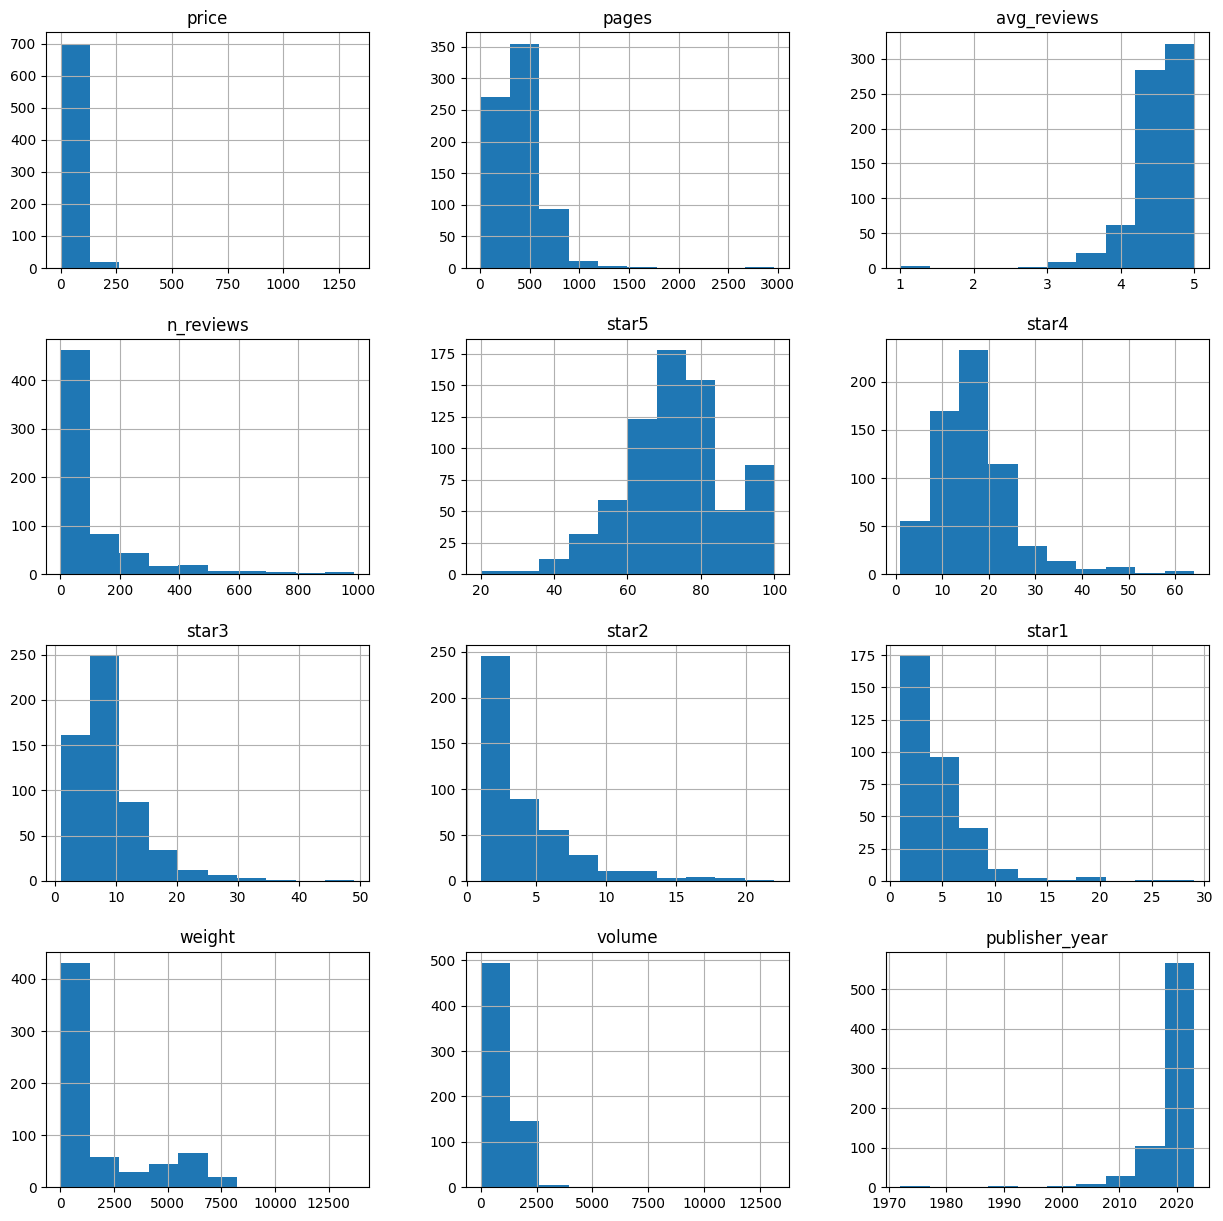

In [17]:
df.hist(figsize=(15, 15))
plt.show()

<AxesSubplot: >

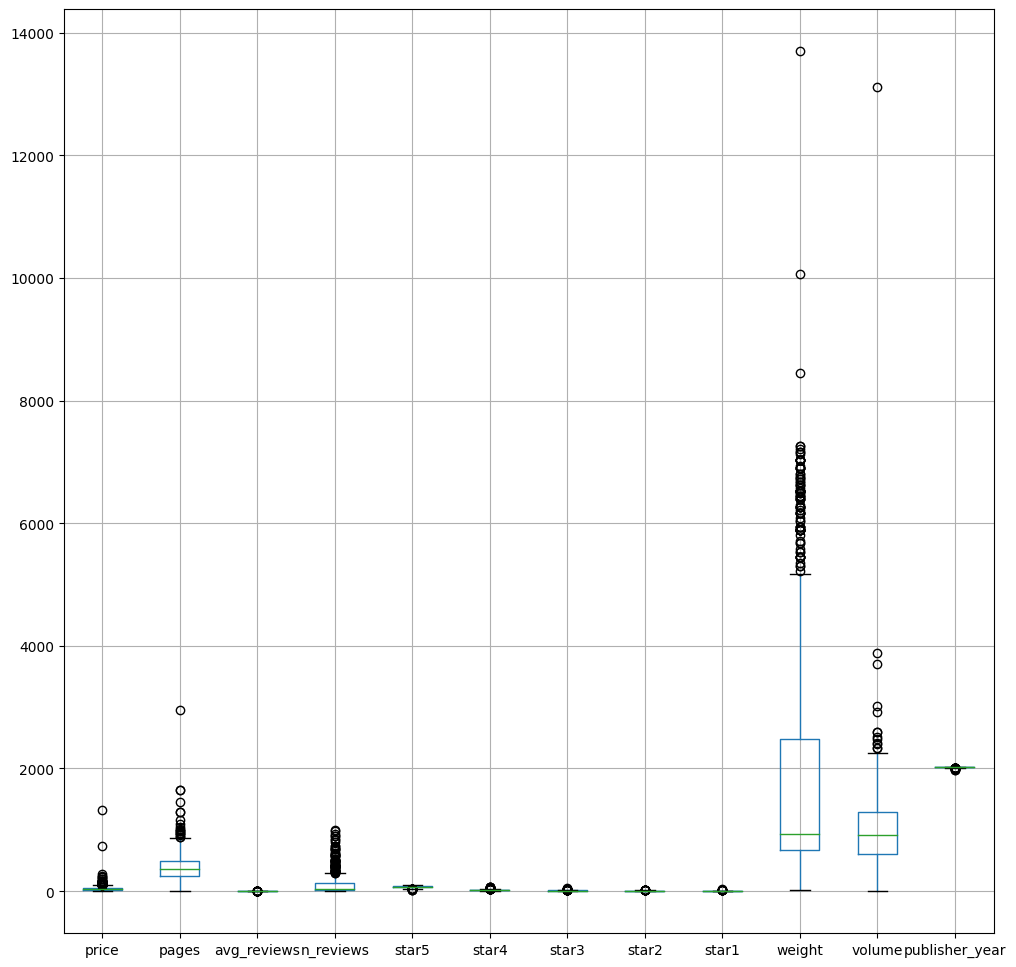

In [18]:
df.boxplot(figsize=(12,12))

The histogram and box plots above further shows us the distribution of the data.

<AxesSubplot: >

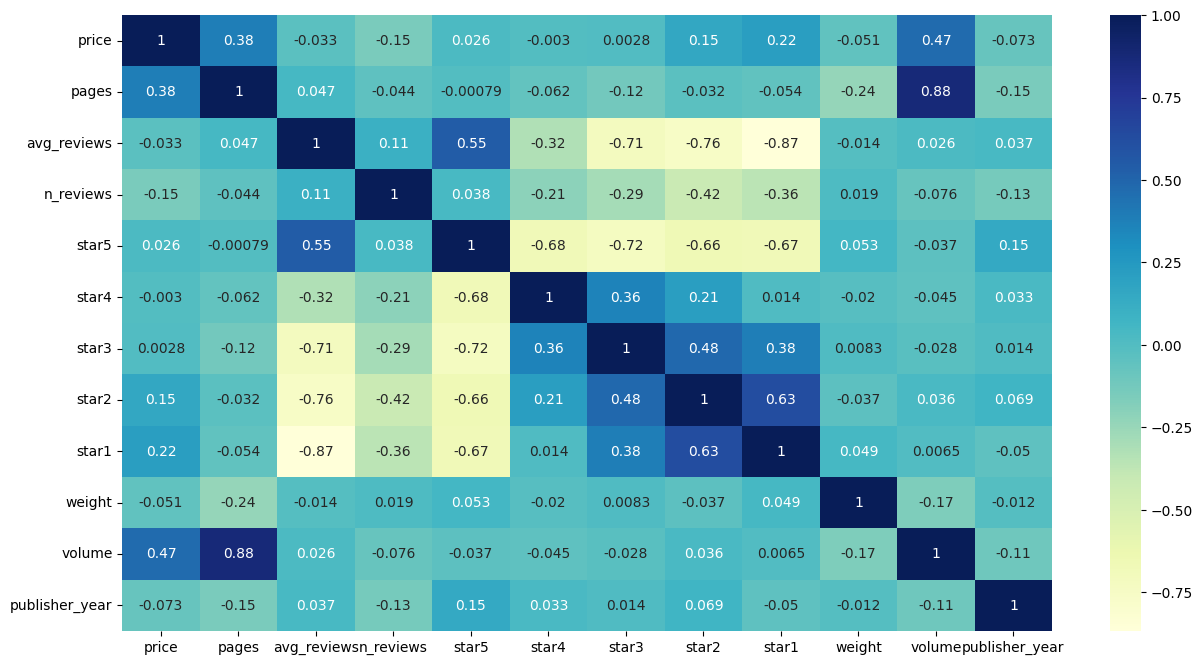

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

The heat map shows that price is highly correlated with the volume and page count of a book, which is to be expected. We can also see a clear correlation relationship with the diffent review columns. 

For example 1-3 star reviews, which are usally considered bad ratings, are negativly correlated with the average rating, while a "perfect" 5 star review has a positive correlation on the average. I would say this also is a rather intiative correlation.

An interesting finding is the signifiacnt positive correlation between price and 1 star review. An interpertation is that the more pricy a book is, the bigger the dissapointment (and therefore likelihood of giving a 1 star rating) will be if the books doesn't live up to the readers expectations. A bad experience with a pricy book might also be the "push" to make a angry reader go ahead an give a bad review in the first place, while the same peson in similarly bad experience, but with a cheap book, would care less and therfore not bother to review it.

However, a suprising finding is that there seem to be almost no correleation between price and average rating, meaning you don't have to spend all your savings to get some of the highest rated books.

In [20]:
# we need to only have the numeric value columns to make the pair plot
df_numeric = df.select_dtypes(include=['Int64', 'float64'])

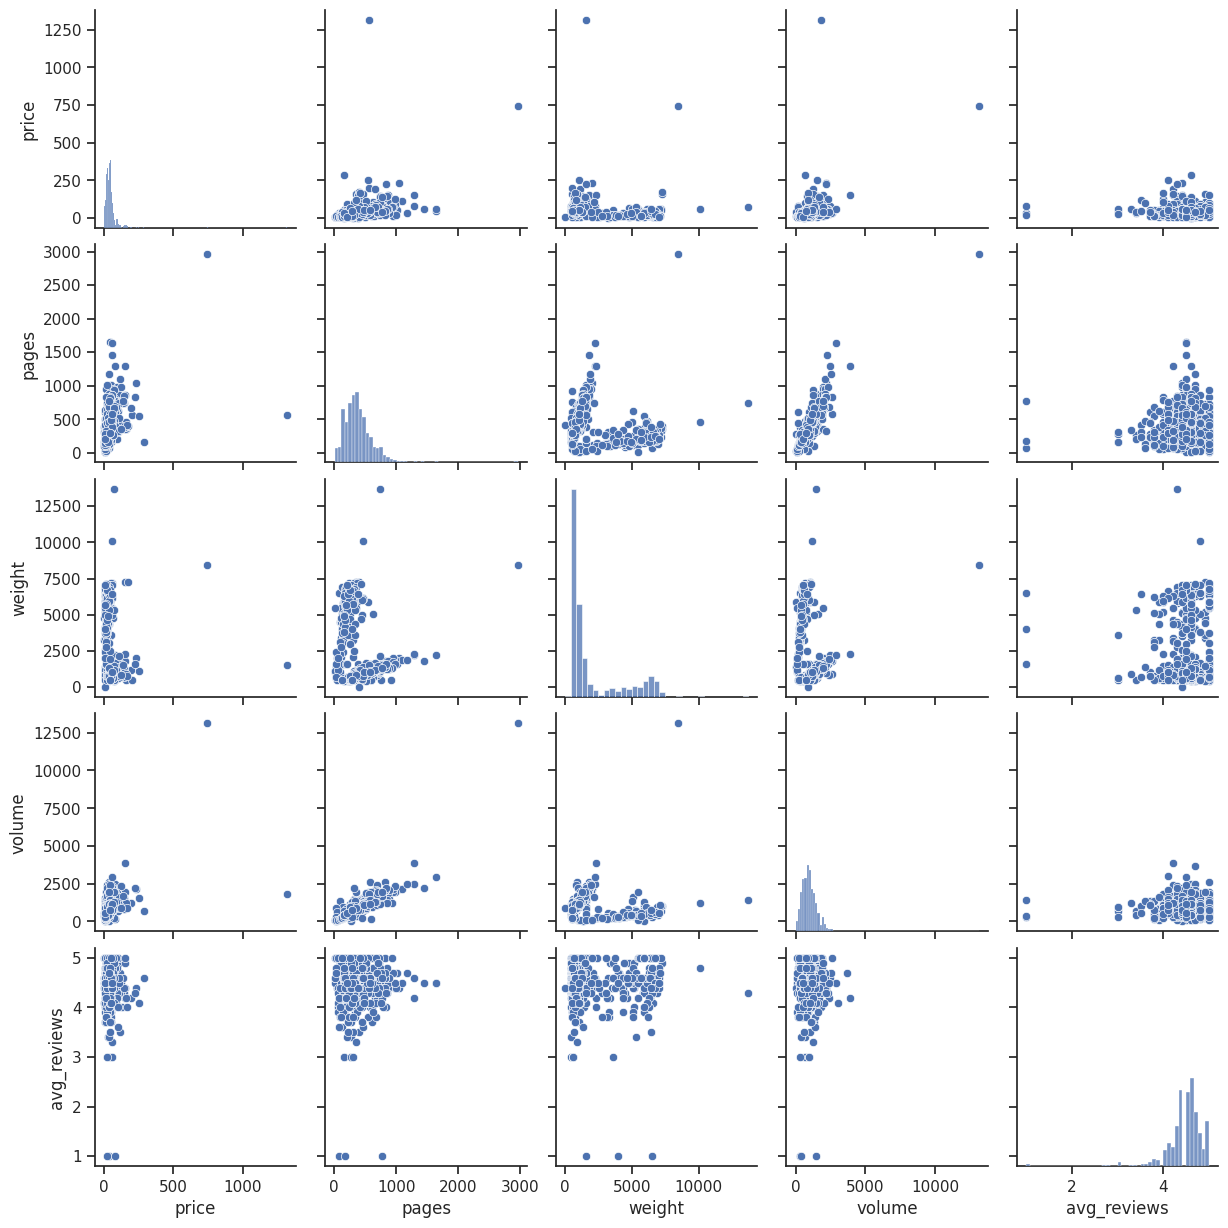

In [21]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_numeric[["price","pages","weight","volume","avg_reviews"]])

So after reviewing the data a bit more, let's get back on track an try to answer our defined questions.

### 1. Which author has written the most books and pages?

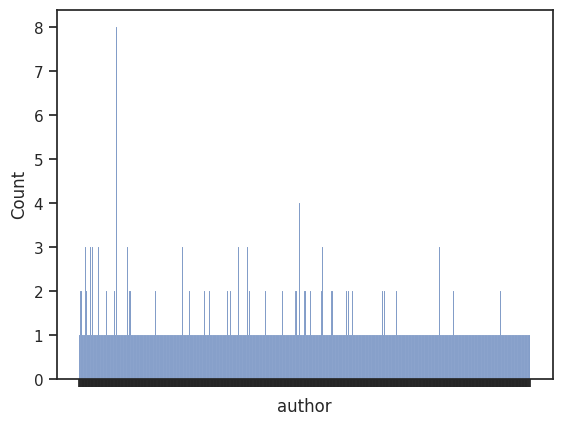

In [22]:
g = sns.histplot(data=df, x="author")
g.set_xticklabels([])
plt.show()

As we can see from the histoplot, several authours have written more than one book. There is also one stand out author who have written 8 books. Now let's identify this author and the other authors in the top 5.

<AxesSubplot: xlabel='author', ylabel='title'>

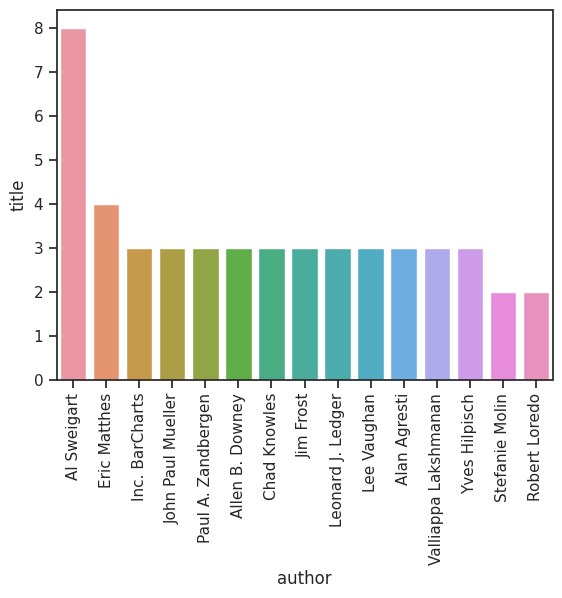

In [23]:
res1A = df.groupby("author", as_index=False).count().sort_values(by="title", ascending=False).head(15)
plt.xticks(rotation=90)
sns.barplot(data=res1A, x="author", y="title")

Here we can see that Al Sweigart has written the most books. But will this top 15 list differ if we look at the author who have written the most pages?

<AxesSubplot: xlabel='author', ylabel='pages'>

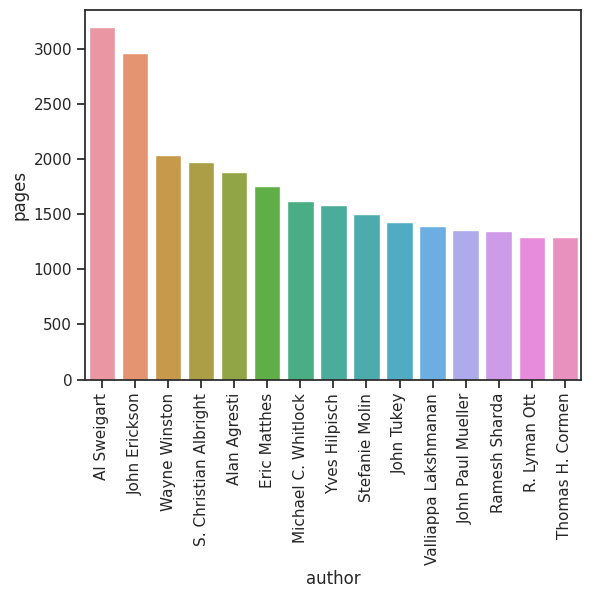

In [24]:
res1B = df.groupby("author", as_index=False).sum().sort_values(by="pages", ascending=False).head(15)
plt.xticks(rotation=90)
sns.barplot(data=res1B, x="author", y="pages")

In [25]:
print("Number of authors on both lists: " + str(30-pd.concat([res1A, res1B])["author"].nunique()))

Number of authors on both lists: 7


As we can see from the bar plot Sweigart takes the no. 1 sport also here, but the rest of the top 15 list is quite different. In total only 7 authors appears on both top lists. We will now look at question number 2:

### 2. Which books have the best price value (rating/price)?

<AxesSubplot: xlabel='title', ylabel='rating_price_ratio'>

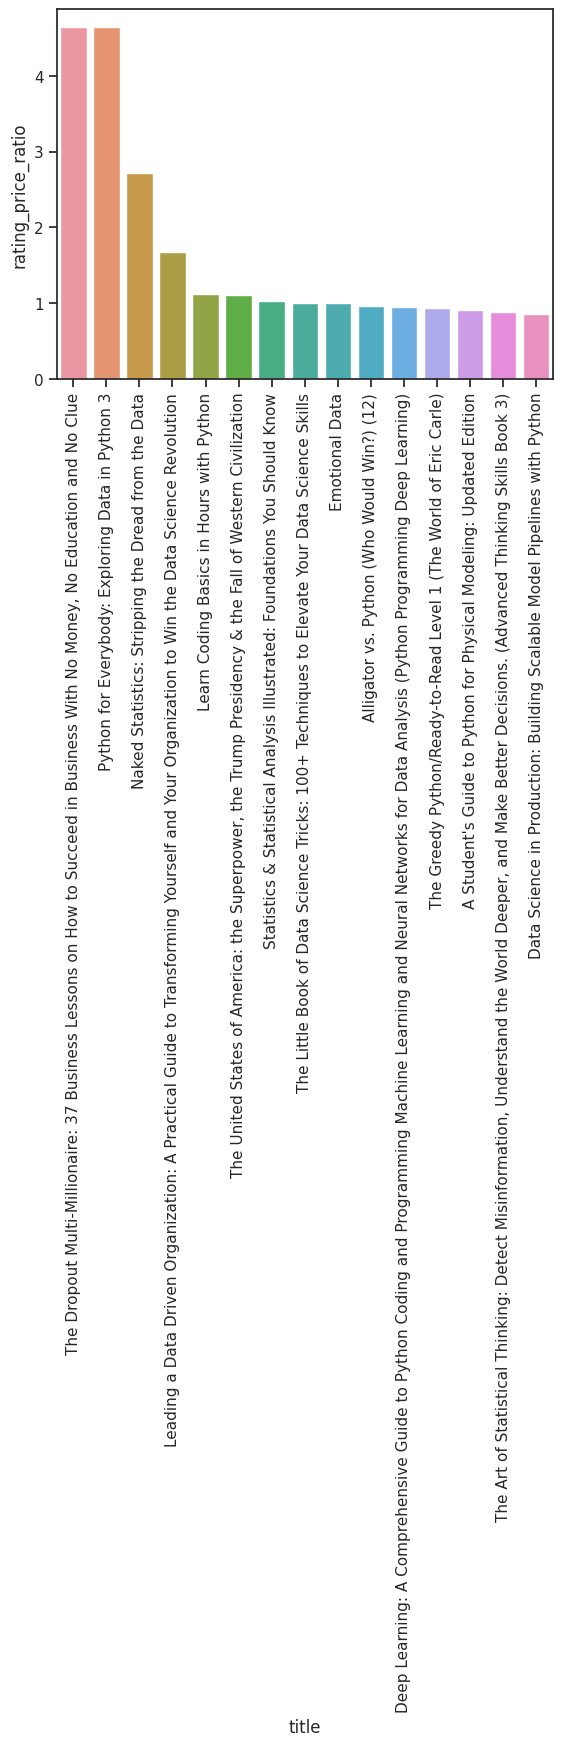

In [26]:
res2 = df
res2["rating_price_ratio"] = res2["avg_reviews"]/res2["price"]
res2 = res2.sort_values(by="rating_price_ratio", ascending=False).head(15)

plt.xticks(rotation=90)
sns.barplot(data=res2, x="title", y="rating_price_ratio")

In [27]:
res2[["title","price","avg_reviews","n_reviews"]]

,title,price,avg_reviews,n_reviews
245,The Dropout Multi-Millionaire: 37 Business Les...,0.99,4.6,235
32,Python for Everybody: Exploring Data in Python 3,0.99,4.6,<NA>
50,Naked Statistics: Stripping the Dread from the...,1.69,4.6,<NA>
641,Leading a Data Driven Organization: A Practica...,2.99,5.0,5
418,Learn Coding Basics in Hours with Python,3.99,4.5,326
716,"The United States of America: the Superpower, ...",3.99,4.4,7
318,Statistics & Statistical Analysis Illustrated:...,3.99,4.1,16
705,The Little Book of Data Science Tricks: 100+ T...,4.99,5.0,2
692,Emotional Data,4.99,5.0,3
604,Alligator vs. Python (Who Would Win?) (12),4.99,4.8,414


In [28]:
print("Mean price: " + str(df["price"].mean()))
print("Mean n_reviews: " + str(df["n_reviews"].mean()))

Mean price: 46.491537396121885
Mean n_reviews: 108.17557251908397


According to the data the books above has the best price value when looking at the relation between the average rating and the price of the book. How ever as the table shows, these books tend to have a very low price as well as few number of reviews. Therefore the result is not that usefull. Let's do the analysis again, but now let's make some restrictions to get some (perhaps) better qualified books. 

The mean price is about 46 $, while the mean number of reviews is about 108. Therefore a retrictipn of 40 and 100 is reasonable in this case.

<AxesSubplot: xlabel='title', ylabel='rating_price_ratio'>

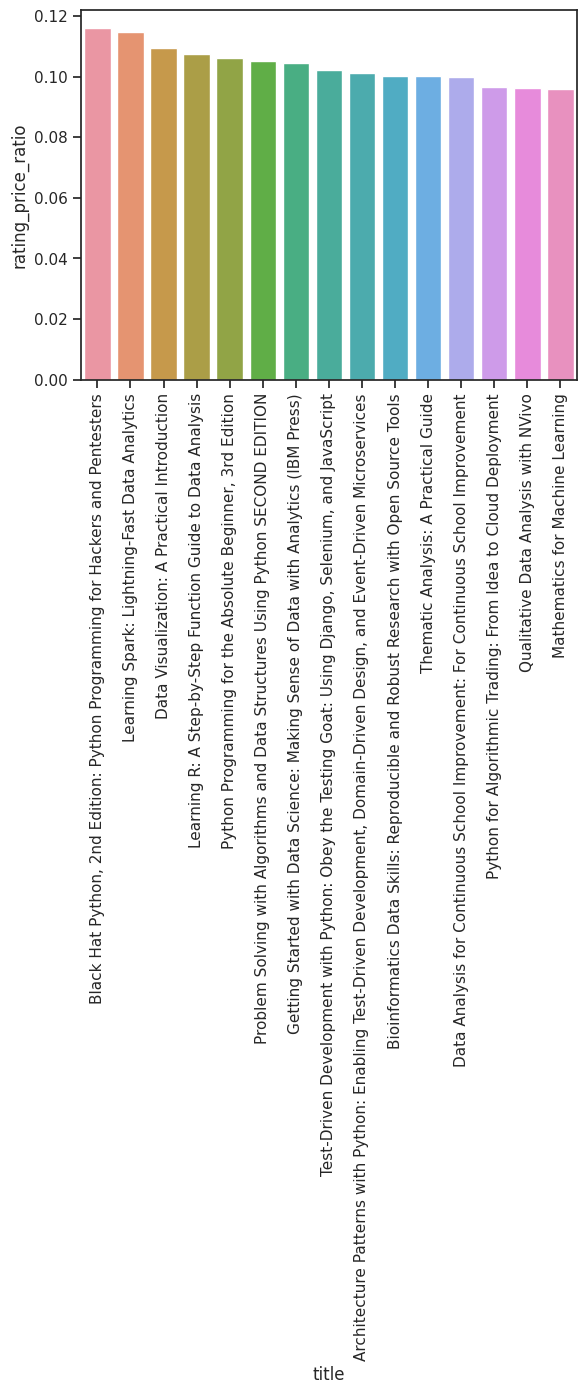

In [29]:
res2B = df[(df["price"] >= 40) & (df["n_reviews"] >= 100)].copy(deep=True)
res2B["rating_price_ratio"] = res2B["avg_reviews"]/res2B["price"]
res2B = res2B.sort_values(by="rating_price_ratio", ascending=False).head(15)

plt.xticks(rotation=90)
sns.barplot(data=res2B, x="title", y="rating_price_ratio")

The results shows that Black Hat Python 2nd Edition provides the best value (rating/price) given the retrictions made.

### 3. What are the most common words in the book titles?

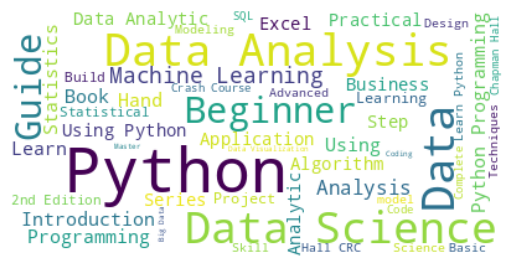

In [30]:
text = df['title'].str.cat(sep=' ')
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
most_common_words = list(wordcloud.words_.keys())[:5]
print('Top 5 common words in the book titles:'
    + "".join("\nNo. " + str(index + 1) + ": " + str(elem) 
    for index, elem in enumerate(most_common_words)))

Top 5 common words in the book titles:
No. 1: Python
No. 2: Data
No. 3: Data Analysis
No. 4: Data Science
No. 5: Guide


The most common words in the book titles are Python, Data, Data Analaysis, Data Science and Guide.

### 4. Does a book with many pages tend to be more pricy?

<AxesSubplot: xlabel='pages', ylabel='price'>

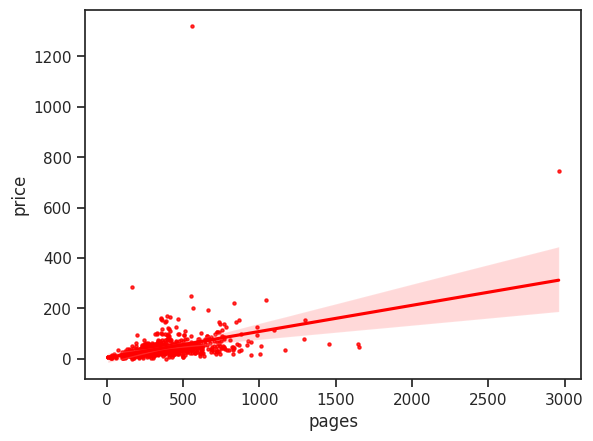

In [32]:
res4 = df
res4["pages"] = res4["pages"].astype('float32') # have to convert type to float32 due to a bug
res4["price"] = res4["price"].astype('float32')
sns.regplot(data=res4, x="pages",y="price",marker='o', color='red', scatter_kws={'s':5})

As expected the price tend to increase as the number of pages increase.

### 5. Does a newer book tend to be more pricy?

First let's take a closer look at the distribution of when the books were published.

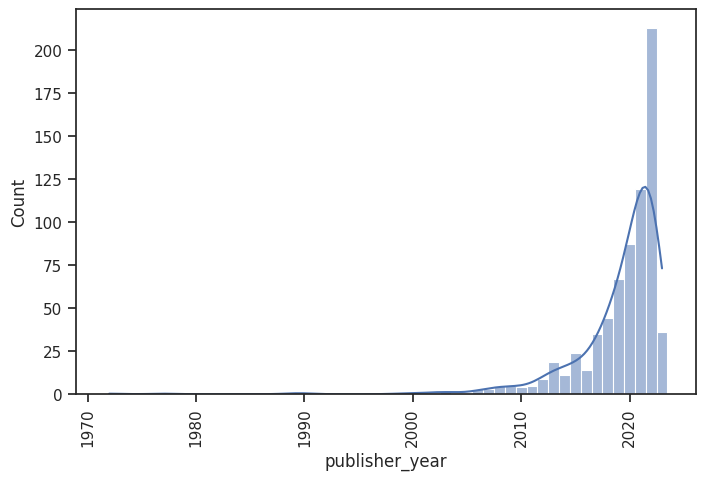

In [33]:
temp = pd.DataFrame(df.to_dict())
plt.figure(figsize=(8,5))
sns.histplot(data=temp.sort_values("publisher_year", ascending=True),x="publisher_year", kde=True)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: xlabel='publisher_year', ylabel='price'>

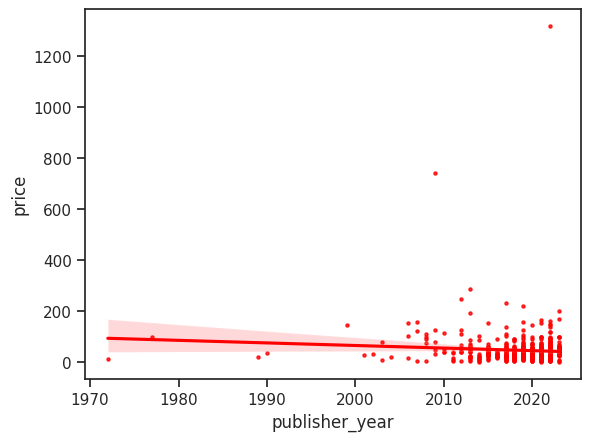

In [34]:
res5 = df
res5["publisher_year"] = res4["publisher_year"].astype('float32') # have to convert type to float32 due to a bug
res5["price"] = res4["price"].astype('float32')
sns.regplot(data=res5, x="publisher_year",y="price",marker='o', color='red', scatter_kws={'s':5})

Suprisinlgy (at least for me) older books tend to be sligtly more pricy than newer books. This can be explained that there is a lot of new books that have a very low price, while older books tend to have a more traditional (and higer) price tag.

That concludes the EDA, now I will use machine learning with the aim of creating a well-performing predictive model to predict the price of a book.

## Machine Learning Price Prediciton

### Preprocessing Data for Machine Learning

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               830 non-null    object 
 1   author              657 non-null    object 
 2   price               722 non-null    float32
 3   pages               736 non-null    float32
 4   avg_reviews         702 non-null    float64
 5   n_reviews           655 non-null    Int64  
 6   star5               702 non-null    Int64  
 7   star4               635 non-null    Int64  
 8   star3               554 non-null    Int64  
 9   star2               451 non-null    Int64  
 10  star1               328 non-null    Int64  
 11  weight              650 non-null    float64
 12  volume              644 non-null    float64
 13  publisher_name      714 non-null    object 
 14  publisher_year      713 non-null    float32
 15  rating_price_ratio  637 non-null    float64
dtypes: Int64

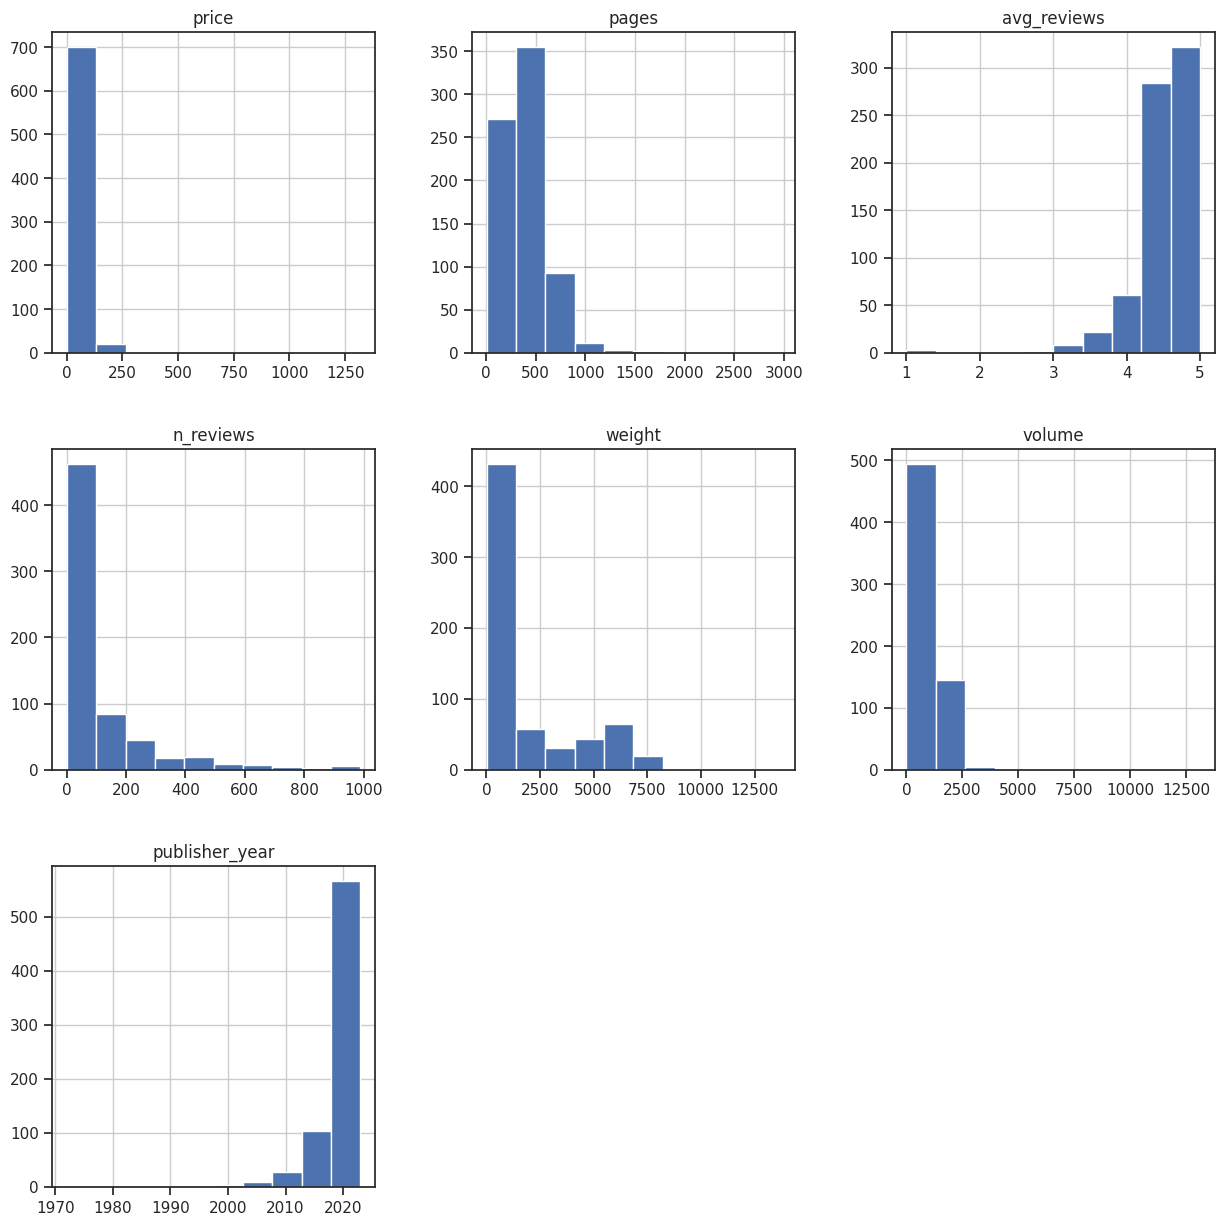

In [36]:
df_dropped_columns = df.drop(columns=['title','author','star5','star4','star3','star2','star1','publisher_name','rating_price_ratio'])
df_dropped_columns.hist(figsize=(15, 15))
plt.show()

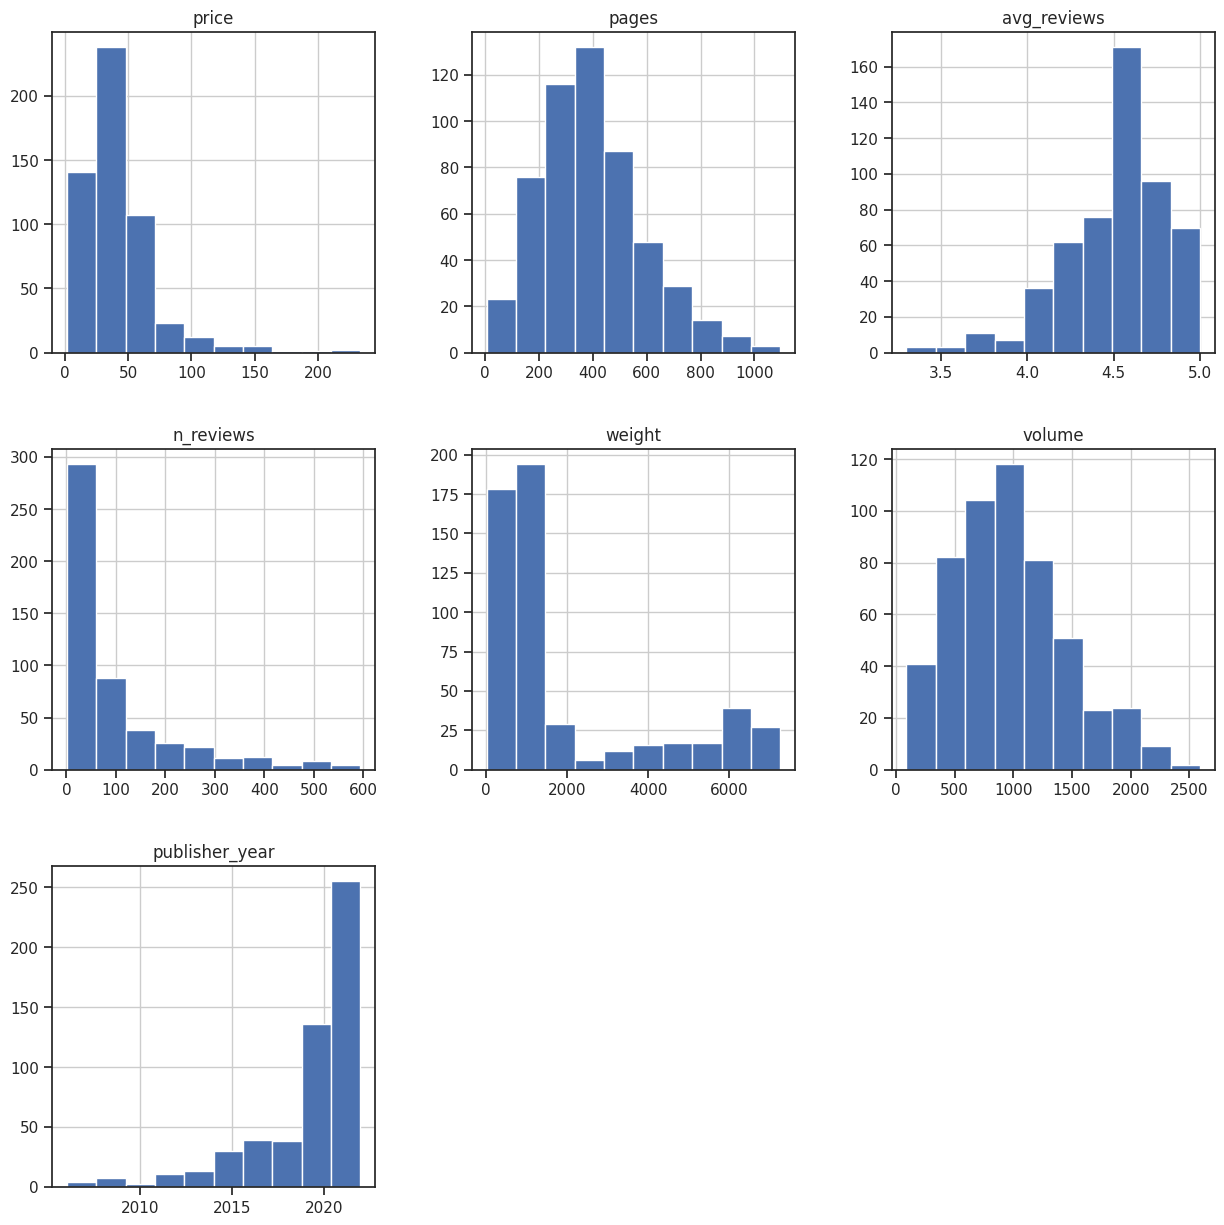

In [37]:
standard_deviations = 3
df_removed_outliers = df_dropped_columns[df_dropped_columns.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations)
   .all(axis=1)] # Source: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
df_removed_outliers.hist(figsize=(15, 15))
plt.show()

In [38]:
df_removed_outliers.isnull().sum()

price              0
pages              0
avg_reviews        0
n_reviews         27
weight             0
volume             0
publisher_year     0
dtype: int64

In [39]:
pd.options.mode.chained_assignment = None
df_filled = df_removed_outliers
df_filled['n_reviews']=df_filled['n_reviews'].fillna(round(df_filled['n_reviews'].mean()))
df_filled['publisher_year']=df_filled['publisher_year'].fillna(round(df_filled['publisher_year'].mean()))
df_filled['price'] = df_filled['price'].round(2)

### Divide Data Into Train and Test Data

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler(feature_range=(0, 1)) # min max scale [0,1]
X = df_filled.drop(columns=["price"])
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = df_filled["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Creating and Training the Models

In [41]:
!pip install lightgbm; # <--- add to requirments
import catboost
import xgboost
import lightgbm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
en = ElasticNet()
svr = SVR()
br = BayesianRidge()
cbr = CatBoostRegressor()
kr = KernelRidge()
lr = LinearRegression()
xgbr = XGBRegressor()
lgbmr = LGBMRegressor()
mlpr = MLPRegressor()

models = [rfr,gbr,en,svr,br,cbr,kr,lr,xgbr,lgbmr,mlpr]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 90.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [42]:
for model in models:
    model.fit(X_train, y_train)

3:	learn: 26.3632754	total: 52.7ms	remaining: 13.1s
4:	learn: 26.1604827	total: 53.9ms	remaining: 10.7s
5:	learn: 25.9593342	total: 55.1ms	remaining: 9.12s
6:	learn: 25.7306795	total: 56.2ms	remaining: 7.97s
7:	learn: 25.5282536	total: 57.4ms	remaining: 7.12s
8:	learn: 25.3020839	total: 59ms	remaining: 6.49s
9:	learn: 25.1247054	total: 64ms	remaining: 6.33s
10:	learn: 24.9365976	total: 64.9ms	remaining: 5.83s
11:	learn: 24.7370952	total: 65.8ms	remaining: 5.42s
12:	learn: 24.5337942	total: 66.8ms	remaining: 5.07s
13:	learn: 24.3492758	total: 67.8ms	remaining: 4.78s
14:	learn: 24.1805966	total: 68.8ms	remaining: 4.52s
15:	learn: 24.0374275	total: 69.7ms	remaining: 4.29s
16:	learn: 23.8476568	total: 70.7ms	remaining: 4.09s
17:	learn: 23.6426351	total: 71.7ms	remaining: 3.91s
18:	learn: 23.5037163	total: 72.7ms	remaining: 3.75s
19:	learn: 23.3491802	total: 73.7ms	remaining: 3.61s
20:	learn: 23.2021626	total: 74.9ms	remaining: 3.49s
21:	learn: 23.1033240	total: 75.8ms	remaining: 3.37s
22:	

### Evaluating the Models

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

model_performance = []
for model in models:
    y_pred = model.predict(X_test)

    R2_score = model.score(X_test, y_test)
    Mean_absolute_error = mean_absolute_error(y_test,y_pred)
    Mean_squared_error = mean_squared_error(y_test,y_pred)
    Root_mean_squared_error = np.sqrt(mean_squared_error(y_test,y_pred))
    Root_mean_squared_log_error = np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
    Median_absolute_error = median_absolute_error(y_test,y_pred)
    
    model_performance.append([model, type(model).__name__,
        R2_score,
        Mean_absolute_error,
        Root_mean_squared_error,
        Mean_squared_error,
        Root_mean_squared_log_error,
        Median_absolute_error])


df_model_performance = pd.DataFrame.from_records(model_performance)
df_model_performance.columns = ["model","name",
        "R2_score",
        "Mean_absolute_error",
        "Root_mean_squared_error",
        "Mean_squared_error",
        "Root_mean_squared_log_error",
        "Median_absolute_error"]
df_model_performance = df_model_performance.sort_values(by="R2_score", ascending=False)
display(df_model_performance)

,model,name,R2_score,Mean_absolute_error,Root_mean_squared_error,Mean_squared_error,Root_mean_squared_log_error,Median_absolute_error
1,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.411965,15.804046,24.529626,601.702534,3.199882,11.195173
9,LGBMRegressor(),LGBMRegressor,0.409566,16.474405,24.579595,604.156510,3.201917,12.508820
5,<catboost.core.CatBoostRegressor object at 0x7...,CatBoostRegressor,0.406639,16.103249,24.640460,607.152271,3.204390,10.960522
7,LinearRegression(),LinearRegression,0.315289,17.037270,26.469323,700.625051,3.275986,12.048869
4,BayesianRidge(),BayesianRidge,0.305459,17.045740,26.658655,710.683881,3.283114,11.881648
0,"(DecisionTreeRegressor(max_features=1.0, rando...",RandomForestRegressor,0.300627,16.817215,26.751215,715.627514,3.286580,11.084101
8,"XGBRegressor(base_score=None, booster=None, ca...",XGBRegressor,0.274120,17.054569,27.253456,742.750854,3.305180,11.107033
6,KernelRidge(),KernelRidge,0.237801,17.935494,27.926948,779.914435,3.329592,11.976771
3,SVR(),SVR,0.077456,17.696003,30.724355,943.985988,3.425056,10.991487
10,MLPRegressor(),MLPRegressor,0.057638,18.934461,31.052605,964.264250,3.435683,13.836019


To do: short explanaton of evaluation parameters, and why I will focus on the R2 score.

<Figure size 1200x2000 with 0 Axes>

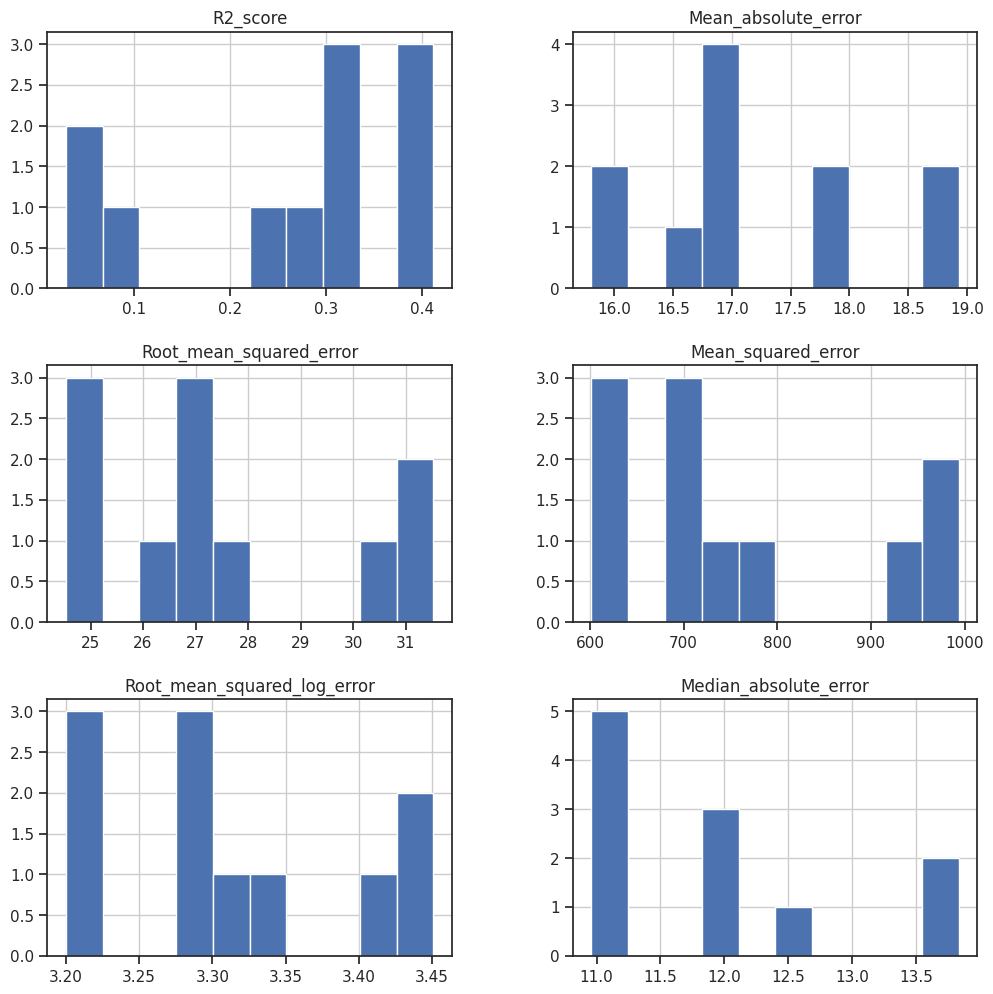

In [44]:
plt.figure(figsize=(12,20))
df_model_performance.hist(figsize=(12, 12))
plt.show()

In [45]:
import plotly.express as px

def make_radar_plot(row):
    df = pd.DataFrame(dict(
        r=[row['R2_score'],row['Mean_absolute_error'],row['Root_mean_squared_error'],row['Mean_squared_error'],
        row['Root_mean_squared_log_error'],row['Median_absolute_error']],
        theta=['R2_score','Mean_absolute_error', 'Root_mean_squared_error','Mean_squared_error',
            'Root_mean_squared_log_error', 'Median_absolute_error']))
    title = row[1]
    fig = px.line_polar(df, r='r', theta='theta', line_close=True)
    fig.update_traces(fill='toself')
    print(f"Radar plot of {row[1]}:")
    fig.show()

row = df_model_performance.loc[df_model_performance['R2_score'].idxmax()]
make_radar_plot(row)

Radar plot of GradientBoostingRegressor:


In [46]:
best_performing_model = row[0]
best_performing_model_name = row[1]
best_performing_R2_score = row[2]
print(f"The best performing model is {best_performing_model_name} with the R2 score {best_performing_R2_score}")

The best performing model is GradientBoostingRegressor with the R2 score 0.411964541614837


In [47]:
y_pred = best_performing_model.predict(X_test)

In [57]:
df_pred_index_sorted = pd.DataFrame({'actual':y_test,'prediction':y_pred}).sort_index()
df_pred = pd.DataFrame({'actual':y_test,'prediction':y_pred}).sort_values(by=["actual"])
display(df_pred_index_sorted)

,actual,prediction
0,6.750000,54.298156
2,32.070000,40.287516
7,90.000000,39.212541
10,20.000000,32.531622
11,15.970000,14.822885
...,...,...
798,22.490000,47.942180
802,19.690001,26.550474
814,49.990002,45.306726
821,39.020000,45.745118


### Visualizing The Model's Predictions

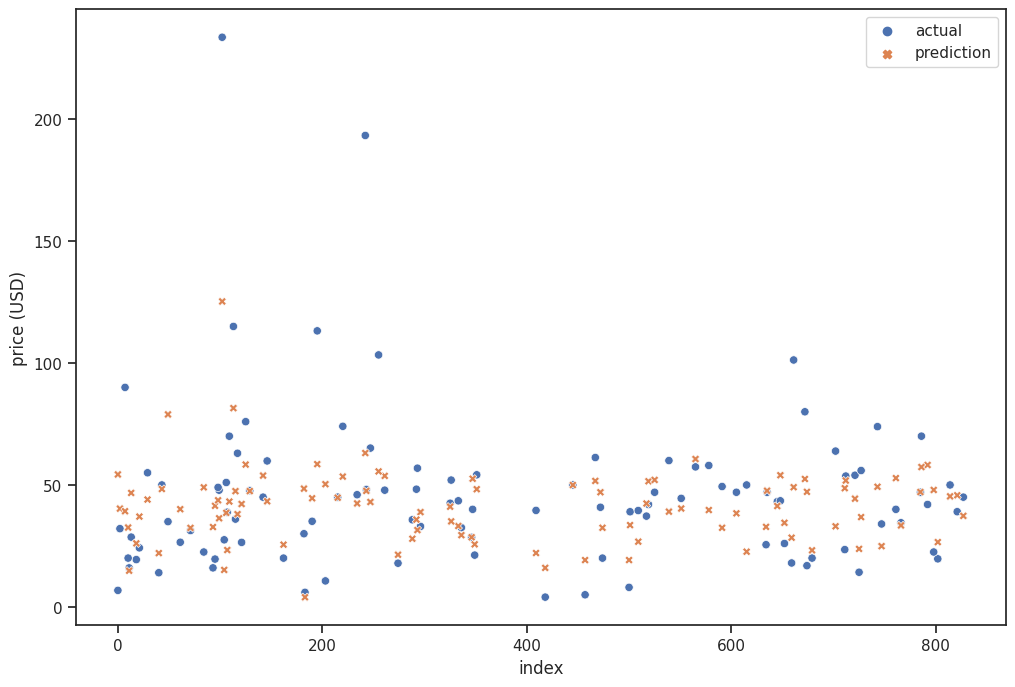

In [49]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_pred)
plt.xlabel("index")
plt.ylabel("price (USD)")
plt.show()

<AxesSubplot: ylabel='Count'>

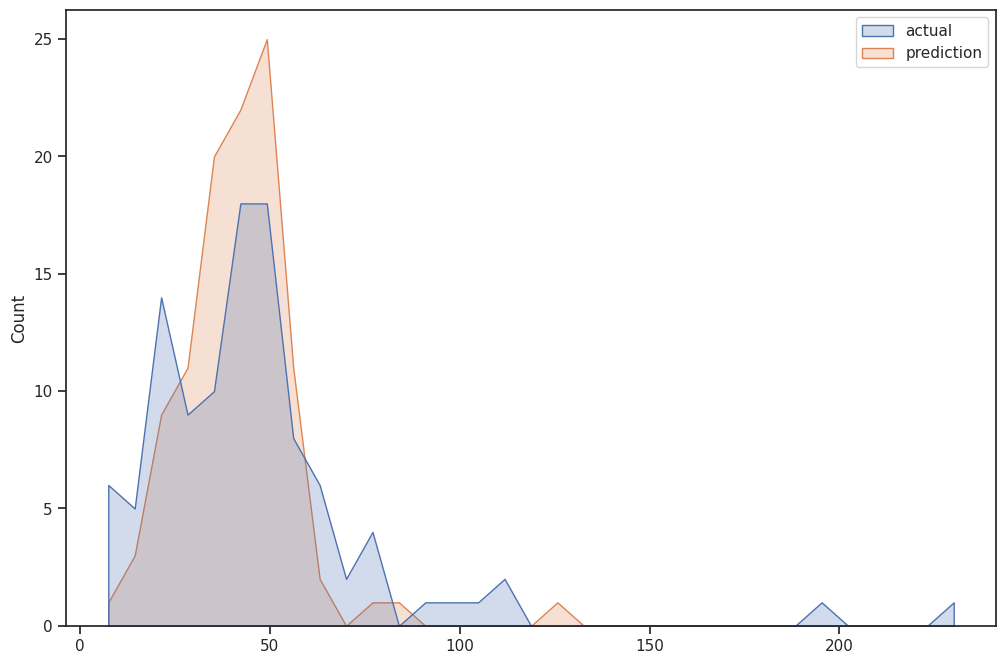

In [50]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_pred, element="poly")

### Deploying the Model

In [51]:
!pip install skops # add to req
from skops import io

io.dump(best_performing_model, "model.skops")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.8/92.8 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.8/661.8 KB 72.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [58]:
df_filled

,price,pages,avg_reviews,n_reviews,weight,volume,publisher_year
0,6.750000,500.0,4.4,23,1147.6,1529.3,2021.0
1,33.720001,484.0,4.3,124,889.0,1174.4,2009.0
2,32.070000,274.0,4.7,10,635.0,861.7,2022.0
3,53.990002,547.0,4.6,94,666.8,1156.4,2017.0
4,24.490000,368.0,3.9,12,589.7,917.6,2022.0
...,...,...,...,...,...,...,...
821,39.020000,774.0,4.6,164,1306.3,1966.1,2022.0
824,9.690000,280.0,4.5,404,3991.6,318.5,2018.0
825,5.330000,208.0,4.5,74,7030.7,532.8,2017.0
826,55.180000,573.0,4.5,93,1020.6,1144.7,2020.0


In [81]:
model = io.load("model.skops", trusted=True)

def price_prediction(model, scaler, pages, avg_reviews, n_reviews, weight, volume, publisher_year):
    X = pd.DataFrame({'pages':pages,'avg_reviews':avg_reviews,'n_reviews':n_reviews,'weight':weight,'volume':volume,'publisher_year':publisher_year}, index=[0])
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    return model.predict(X), X

actual_price = 6.75
pages = 500
avg_reviews = 4.4
n_reviews = 23
weight = 2.53/2.205 # kg
volume = (8.5*2.02*11)/16.387
publisher_year = 2021



price2, df_X2 = price_prediction(model, scaler, 274.0,4.7,10,635.0,861.7,2022.0)


weight = 1147.6
volume = 1529.3

price1, df_X = price_prediction(model, scaler, pages, avg_reviews, n_reviews, weight, volume, publisher_year)
display(df_X2)
print(price2, price1, scaler, model)


,pages,avg_reviews,n_reviews,weight,volume,publisher_year
0,0.0,0.0,0.0,0.0,0.0,0.0


[52.72731376] [52.72731376] MinMaxScaler() GradientBoostingRegressor()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7957e18a-a180-48dd-b5a8-5f2271f20987' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>